In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

## The MNIST Data

The MNIST data is hosted on Yann LeCun's website. If you are copying and pasting in the code from this tutorial, start here with these two lines of code which will download and read in the data automatically:

```python
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)
```

The MNIST data is split into three parts: 55,000 data points of training data `(mnist.train)`, 10,000 points of test data `(mnist.test)`, and 5,000 points of validation data `(mnist.validation)`. This split is very important: it's essential in machine learning that we have separate data which we don't learn from so that we can make sure that what we've learned actually generalizes!

As mentioned earlier, every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are `mnist.train.images` and the training labels are `mnist.train.labels.`

Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:

![](https://www.tensorflow.org/images/MNIST-Matrix.png)

We can flatten this array into a vector of 28x28 = 784 numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space, with a very rich structure (warning: computationally intensive visualizations).

Flattening the data throws away information about the 2D structure of the image. Isn't that bad? Well, the best computer vision methods do exploit this structure, and we will in later tutorials. But the simple method we will be using here, a softmax regression (defined below), won't.

The result is that mnist.train.images is a tensor (an $n$-dimensional array) with a shape of `[55000, 784]`. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.

![](https://www.tensorflow.org/images/mnist-train-xs.png)

Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

For the purposes of this tutorial, we're going to want our labels as "one-hot vectors". A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the 
th digit will be represented as a vector which is 1 in the 
th dimension. For example, 3 would be 
. Consequently, mnist.train.labels is a `[55000, 10]` array of floats.

![](https://www.tensorflow.org/images/mnist-train-ys.png)

We're now ready to actually make our model!

출처 : https://www.tensorflow.org

In [2]:
# mnist 데이터 불러오기

mnist = input_data.read_data_sets('data/', one_hot = True)
training_img = mnist.train.images
training_lab = mnist.train.labels
test_img = mnist.test.images
test_lab = mnist.test.labels

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


트레이닝 이미지의 타입은 <class 'numpy.ndarray'> 
차원은 (55000, 784)
선택한 이미지의 라벨은 6


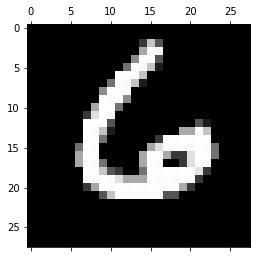

In [3]:
# mnist 데이터 살펴보기

print ("트레이닝 이미지의 타입은 {}".format(type(training_img)),"\n차원은 {}".format(np.shape(training_img)))

r = np.random.choice(len(training_img), size=1)

sample_img = training_img[r]
sample_img = np.reshape(sample_img, (28, 28))
plt.matshow(sample_img, cmap=plt.get_cmap('gray'))

sample_lab = training_lab[r]
print ("선택한 이미지의 라벨은 {}".format(np.argmax(sample_lab)))

선택한 이미지의 라벨은 3


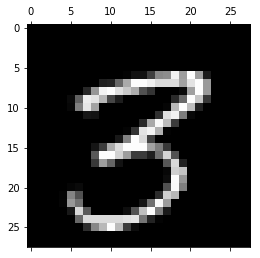

In [4]:
r = 39596

sample_img = training_img[r]
sample_img = np.reshape(sample_img, (28, 28))
plt.matshow(sample_img, cmap=plt.get_cmap('gray'))

sample_lab = training_lab[r]
print ("선택한 이미지의 라벨은 {}".format(np.argmax(sample_lab)))

![](data/sample_3.png)

In [5]:
# 변수들을 설정한다.
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
H = tf.nn.softmax(tf.matmul(X, W) + b)

In [6]:
loss = - tf.reduce_mean(tf.reduce_sum(Y * tf.log(H), reduction_indices=[1]))
train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

correct_prediction = tf.equal(tf.argmax(H,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Accuracy of Test data : 0.9188


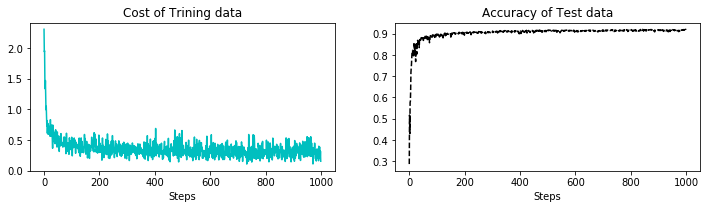

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    _, cost = sess.run([train, loss], feed_dict={X: batch_xs, Y: batch_ys})
    acc = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
    cost_list.append(cost)
    acc_list.append(acc)

    
    
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.title("Cost of Trining data")
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c")

plt.subplot(222)
plt.title("Accuracy of Test data")
plt.xlabel("Steps")
_ = plt.plot(acc_list, "k--")

print("Accuracy of Test data : %s" %acc)

## 위 코드는 Hidden layer가 없는 모델로 더 높은 정확도를 얻을 수 있는 모델을 28일(목요일) 다룰 예정입니다.